In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight


In [8]:
TRAIN_DIR = "../dataset/train"
TEST_DIR = "../dataset/test"
IMG_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 60

os.makedirs("../outputs/models", exist_ok=True)
os.makedirs("../outputs/plots", exist_ok=True)


In [3]:

# =====================
# Data Generators
# =====================
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [4]:
# =====================
# Class Weights
# =====================
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_gen.classes),
    y=train_gen.classes
)
class_weights = dict(enumerate(class_weights))


In [5]:
# =====================
# Model
# =====================
base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
# =====================
# Callbacks
# =====================
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("../outputs/models/best_model.h5", save_best_only=True)
]


In [9]:
# =====================
# Training
# =====================
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=EPOCHS,
    class_weight=class_weights,
    callbacks=callbacks
)


Epoch 1/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2706 - loss: 6.3738

16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.3147 - loss: 5.6935 - val_accuracy: 0.3485 - val_loss: 3.3072
Epoch 2/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3436 - loss: 3.7946

16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.3785 - loss: 3.6635 - val_accuracy: 0.3939 - val_loss: 2.2066
Epoch 3/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4431 - loss: 3.8474

16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.4263 - loss: 3.7740 - val_accuracy: 0.4545 - val_loss: 1.6779
Epoch 4/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.4303 - loss: 3.2013 - val_accuracy: 0.5152 - val_loss: 1.7971
Epoch 5/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4911 - loss: 3.0357

16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5259 - loss: 2.6435 - val_accuracy: 0.5000 - val_loss: 1.5845
Epoch 6/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5265 - loss: 3.0299

16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5777 - loss: 2.4356 - val_accuracy: 0.5455 - val_loss: 1.1813
Epoch 7/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.6255 - loss: 2.1833 - val_accuracy: 0.5303 - val_loss: 1.2668
Epoch 8/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6042 - loss: 2.0573

16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.6016 - loss: 2.1090 - val_accuracy: 0.5909 - val_loss: 1.0943
Epoch 9/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6380 - loss: 1.8691

16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.6653 - loss: 1.5470 - val_accuracy: 0.6212 - val_loss: 0.8376
Epoch 10/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.6733 - loss: 1.6979 - val_accuracy: 0.6667 - val_loss: 0.9079
Epoch 11/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7037 - loss: 1.2804

16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.7092 - loss: 1.1977 - val_accuracy: 0.6818 - val_loss: 0.7029
Epoch 12/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7397 - loss: 1.1982

16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.7331 - loss: 1.1716 - val_accuracy: 0.7121 - val_loss: 0.6410
Epoch 13/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7564 - loss: 1.1149

16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7689 - loss: 1.0238 - val_accuracy: 0.7273 - val_loss: 0.5791
Epoch 14/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7544 - loss: 0.8924

16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7410 - loss: 0.9732 - val_accuracy: 0.7273 - val_loss: 0.5605
Epoch 15/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.7570 - loss: 0.8682 - val_accuracy: 0.7273 - val_loss: 0.6184
Epoch 16/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.7809 - loss: 0.8947 - val_accuracy: 0.7424 - val_loss: 0.5806
Epoch 17/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7845 - loss: 0.6330

16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.7968 - loss: 0.7048 - val_accuracy: 0.8485 - val_loss: 0.4327
Epoch 18/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7888 - loss: 0.8019 - val_accuracy: 0.8030 - val_loss: 0.4997
Epoch 19/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8154 - loss: 0.8142

16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8207 - loss: 0.7041 - val_accuracy: 0.8182 - val_loss: 0.4243
Epoch 20/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8621 - loss: 0.4298

16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8526 - loss: 0.4445 - val_accuracy: 0.8485 - val_loss: 0.3405
Epoch 21/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8181 - loss: 0.6448

16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8685 - loss: 0.4620 - val_accuracy: 0.8485 - val_loss: 0.3292
Epoch 22/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8073 - loss: 0.8734

16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7968 - loss: 0.7935 - val_accuracy: 0.8485 - val_loss: 0.2928
Epoch 23/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8008 - loss: 0.6564 - val_accuracy: 0.8485 - val_loss: 0.2961
Epoch 24/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8446 - loss: 0.5207 - val_accuracy: 0.8333 - val_loss: 0.3347
Epoch 25/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8446 - loss: 0.5948 - val_accuracy: 0.8333 - val_loss: 0.3645
Epoch 26/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8247 - loss: 0.5685 - val_accuracy: 0.8485 - val_loss: 0.3271
Epoch 27/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8446 - loss: 0.5217 - val_accuracy: 0.8485 - val_loss: 0.3115


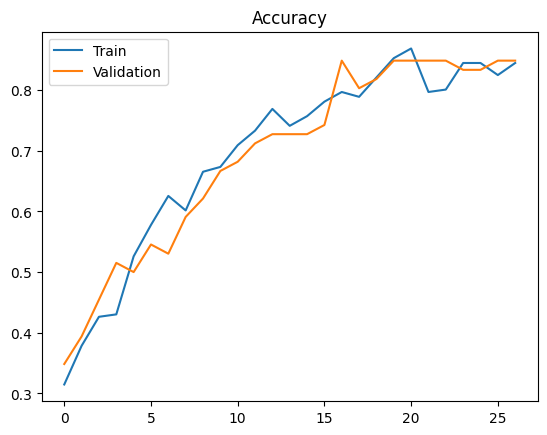

In [10]:
# =====================
# Plot Accuracy
# =====================
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(["Train", "Validation"])
plt.savefig("../outputs/plots/accuracy.png")


Training complete.


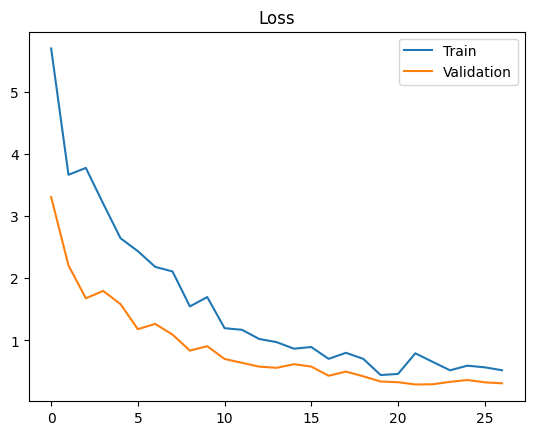

In [11]:
# =====================
# Plot Loss
# =====================
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.legend(["Train", "Validation"])
plt.savefig("../outputs/plots/loss.png")

print("Training complete.")